# Data Manipulation using Pandas



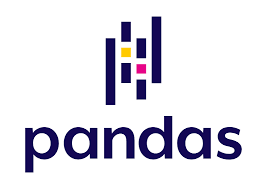

Pandas is a Python library that provides powerful, flexible and high-performance tools for data processing. It was created by Wes McKinney in 2008.


The following are some of its key features:
* Provides high-performance DataFrame objects with effective indexing.
* Provides tools for loading data into memory with multiple file formats.
* Provides high performance for operations such as data merges and joins.
* Provides support for manipulating time series data.
* Row and column data can be easily manipulated.
* SQL-like operations are supported.
* Vectorized operations are supported.
* Large data sets can be sliced, indexed, and subset based on their label.


In this  blog post we are going to learn about different data manipulation using pandas 



# 1- Sorting a DataFrame
Pandas allow you to sort data in different ways.  Below are some ways to sort data.

### Sort DataFrame by index
Usually, our index is meaningless and starts from zero. However,The index can serve as a sorting mechanism in some cases.

You can sort a DataFrame object by index by calling sort_index(). By default, the index is sorted ascending; for descending order, pass ascending=False 

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(4,2), index=[3,1,0,2], columns = ['c1','c2'])
print("Original DataFrame")
print(df)
print("-------------------------------------")

sorted_df = df.sort_index()
print(" sorted DataFrame(ascending)" )
print(sorted_df)
print("-------------------------------------")

print(" Sorted DataFrame (descending) ")
sorted_df = df.sort_index(ascending=False)
print(sorted_df)


### Sort DataFrame by value

Sorting is done by sort_values(), which sorts Series by value, and DataFrame by column. The option by is used to specify which columns to use to determine the sort order.



In [ ]:
d={"a" : [4, 1, 1, 2], "b":[1, 4, 2, 6], "c":[3,1,6,5]}
df = pd.DataFrame(d)
print("Original DataFrame ")
print(df)
print("-------------------------------------")

sorted_df = df.sort_values(by="a")
print("The  DataFrame is sorted by the column \"a\"")
print(sorted_df)
print("-------------------------------------")

sorted_df = df.sort_values(by=["a","b"])
print("The  DataFrame is sorted by the both column \"a\" and \"b\"")
print(sorted_df)
print("-------------------------------------")

# 2-Apply Function to a DataFrame

Data Frames can be operated on using the apply() function in Pandas. Let's see how that works.

### Use apply function
Using apply(), you can pass a function or lambda to a single column, which allows the user to apply the function to each value of the pandas Series and return the result.


In [ ]:

d = {"a": [1,2,3,4],"b":[2,3,4,5],"c":[3,4,5,6]}
df = pd.DataFrame(d)
print(" original DataFrame")
print(df)
print("--------------------------------------")
df["a*2"] = df["a"].apply(lambda s:s*2)

print(df)

###  Apply on multiple columns

As seen in the last example, pandas is only sending a single column to the function. You need to pass axis=1 if you want to create a column based on two columns; then the entire row will be passed to the function/lambda. 


In [ ]:

d = {"a": [1,2,3,4],"b":[2,3,4,5],"c":[3,4,5,6]}
df = pd.DataFrame(d)
print(" Original DataFrame")
print(df)
print("--------------------------------------")
df["a+b"] = df.apply(lambda row:row.a + row.b, axis=1)
print(df)

# 3-Drop Duplicate Row
Data cleaning often involves removing duplicate rows from a dataset. Sometimes the whole row is dropped when it is a duplicate. At other times, we only drop the rows based on selected columns.

Drop_duplicates is a powerful and convenient function provided by Pandas. Let's find out how to use it.

### Check for duplicate rows in the DataFrame.

It may be necessary to determine if a row or only selected columns are duplicated before removing them from the table. The duplicated() function lets you know whether the values of a column are identical or not. You can apply this function to the index, series, and Data Frame

. You can find out whether the whole row is duplicated with df.duplicated()
. Use df.duplicated(subset=["col1", "col2"]) to determine if some selected columns are duplicated

### Drop the whole row
Using drop_duplicates(), you can simply get rid of duplicate rows based on the whole row


In [ ]:
df.drop_duplicates()

### Drop rows based on selected columns

When using the drop_duplicates function, all the columns will be used to determine whether or not a row is a duplicate. However, you may want to remove rows on specific columns. We can use the option subset to identify duplicate rows by passing the column name


If you wish to keep some duplicate rows, the option, (keep) determines which duplicate rows (if any) should be kept :

* First: Drops duplicates except for the first.
* Last: Drops duplicates except for the last.
* False: Drops all duplicate rows

In [ ]:
d = {
    "col1": [1, 2, 3, 4, 5],
    "col2": ["aa", "aa", "b", "d", "d"],
    "col3": [1, 1, 5, 4, 3]
}

df = pd.DataFrame(d)
print("original DataFrame")
print(df)
print("----------------------------------")
result = df.drop_duplicates(subset=["col2", "col3"], keep="last")

print(result)


# 4 -Deal With datetime

Now let's see how we can deal with datetime in Pandas.

Pandas includes extensive features and capabilities for working with time series data, which means it has a lot of features to deal with datetime-related issues

### Generate date range

Using date_range, a series of dates can be generated whose default frequency is a DAY.

The following example generates a series of 5 days.

In [ ]:
pd.date_range("1/1/2020", periods=5)

What follows is a table containing the most common abbreviations for frequency.


Abbreviation |Meaning 
-------------|------- 
D|Day
W|week
M|month 
B|work day
SM|half month
MS| month start
Q| end of quarter
H| hour
T| minute

 ### Convert string to timestamp
    
By calling to_datetime, you can parse a string into a timestamp. The equivalent is calling the timestamp
    

In [ ]:
ts = pd.to_datetime("2020/1/1")
print(ts)
ts2 = pd.Timestamp("2020/1/1")
print(ts2)

 In above  code, the first line shows how to convert a string into a datetime object by calling to_datetime(). The third line does the same thing, but by utilizing the Timestamp function.
 
 

# 5- Export Data to File

A local file has to be exported in many cases so that data can be stored permanently. Let's explore how data can be exported from memory to local files. Apart from common text-like formats, such as CSV and JSON, it also supports some binary formats, such as pickle and hdf. In this blog we will only cover CSV and Excel. The usage of these formats will be the same as for other formats.



### Export data to CSV file 

A DataFrame is essentially a 2D table, so it makes sense to store the file as a CSV file.
To export to a CSV file, simply call to_csv().


In [ ]:
d = {"a": [1, 2, 3, 4], "b": [2, 3, 4, 5], "c": [3, 4, 5, 6]}
df = pd.DataFrame(d)
df.to_csv('output/d.csv')

here are some important options you need to know.

* index: The default value is True, which would export the index to the file, too. Even if your original data doesn’t need any index, it still adds the integer index starting from 0. If you don’t need it, just pass index=False.

* sep: The default separator is a comma, but you can specify a custom delimiter

* float_format: You may want to save some storage because the default floating has a very long floating-point number. float_format='%.2f' rounds to two decimals.

* header: The default value is True. If you don’t need the column names, just set header=False.

* na_rep: If your data has a missing value, in other words, the data has NA, you can pass a string to represent these missing values.

### Export data to an Excel file


Exporting Data Frames to an Excel file is slightly different from the CSV file because Excel files support multiple sheets. To write a single DataFrame to an Excel .xlsx file, it is only necessary to specify a file name.
In order to write to multiple sheets, you must create an ExcelWriter object with the target file name and a sheet within the file.
Meanwhile, to_excel() also supports the index, na_sep, header, and float_format options mentioned above.



In [ ]:

d = {"a": [1, 2, 3, 4], "b": [2, 3, 4, 5], "c": [3, 4, 5, 6]}
df = pd.DataFrame(d)
# The **sheet_name** is optional.
df.to_excel("output/output.xlsx", sheet_name='Sheet_name_1')

df1 = pd.DataFrame(d)

with pd.ExcelWriter('output/output2.xlsx') as writer:  
    df.to_excel(writer, sheet_name='Sheet_name_1')
    df1.to_excel(writer, sheet_name='Sheet_name_2') 